<a href="https://colab.research.google.com/github/manishaachary13/Descriptive-statistics/blob/main/Marketing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Purchase Behavior Analysis Using Descriptive Statistics**


**Name** -  **R Manisha Achary**

## **Problem Statement**

Welcome to the Probability And Statistics Project. In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your oppertunity to dive deep into the world of data analysis and given practical experience with the tools and techniques you've been learned.

### **Objective:**
Our mission is to analyze the provided dataset containing customer information and purchasing behaviour to make informed decisions. Your goal is to identify patterns, trends and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates.

### About The Dataset

This data is gathered during last year's campaign. Data description is as follows:
1. **Response(target)**: 1 if customer accepted the offer in the last campaign, 0 otherwise.
2. **ID**: Unique ID of each customer
3. **Year_Birth**: Age of the customer
4. **Complain**: 1 if the customer complained in the last 2 years.
5. **Dt_Customer**: Date of customer's enrollment with the company
6. **Education**: Customer's level of education.
7. **Marital**: Customer's marital status
8. **Kidhome**: Number of small children in customer's household.
9. **Teenhome**: Number of teenagers in customer's household
10. **Income**: Customer's yearly household income
11. **MntFishProducts**: The amount spent on fish products in the last 2 years
12. **MntMeatProducts**: The amount spent on meat products in the last 2 years
13. **MntFruits**: The amount soent on fruits products in the last 2 years
14. **MntSweetProducts**: The amount spent on sweet products in the last 2 years
15. **MntWines**: The amount spent on wine products in the last 2 years
16. **MntGoldProds**: The amount spent on gold products in the last 2 years
17. **NumDealsPurchases**: Number of purchases made with discount
18. **NumCatalogPurchases**: Number of purchases made using catalog(buying goods to be shipped through the mail).
19. **NumStorePurchases**: Number of purchases made directly in stores.
20. **NumWebPurchases**: Number of purchases made through the company's website.
21. **NumWebVisistsMonth**: Number of visits to company's website in the last month.
22. **Recency**: Number of days since the last purchase.

### Task 1 - **Basic Cleanup**

#### Load Dataset

In [1]:
import pandas as pd

# Load the Excel file to review its contents and sheets
file_path = '/content/sample_data/superstore marketing data.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
excel_data.sheet_names


['Sheet1']

#### Dataset first look

In [3]:
# Load data from sheet to inspect their structure and content
sheet1_data = excel_data.parse('Sheet1')
# Display the first few rows of the sheet to understand it's content
sheet1_preview = sheet1_data.head()
sheet1_preview

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


#### Dataset shape

In [20]:
sheet1_preview.shape

(5, 22)

#### Dataset Info and Description

In [4]:
# Review basic information and structure of Sheet1 to identify cleaning needs
sheet1_data.info()

# Display summary statistics to identify potential issues like missing values or outliers
sheet1_data['Dt_Customer'].describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Dt_Customer
count,2240
unique,401
top,########
freq,916


In [5]:
pip install --upgrade pandas


#### Numerical Data description

In [6]:
numeric_data = sheet1_data.select_dtypes(include=['number'])
numeric_data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


#### Handling Missing value

In [ ]:
# Step 1: Handling missing values
# For Income, use median imputation as it is robust to outlierss


#### Correcting Data type

In [ ]:

# Step 2: Correcting data types
# Convert 'Dt_Customer' to datetime and handle invalid entries
sheet1_data['Dt_Customer'] = pd.to_datetime(sheet1_data['Dt_Customer'], errors='coerce')

#### Identify Outliers in "Income"

In [ ]:

# Step 3: Identify and cap outliers in 'Income'
income_threshold = sheet1_data['Income'].quantile(0.99)  # Set threshold as 99th percentile
sheet1_data['Income'] = sheet1_data['Income'].clip(upper=income_threshold)

#### Validate and correct implausible values

In [ ]:


# Step 4: Validate and correct implausible values in 'Year_Birth'
current_year = pd.Timestamp.now().year
sheet1_data['Year_Birth'] = sheet1_data['Year_Birth'].apply(
    lambda x: x if 1900 <= x <= current_year else None
)

#### Drop rows with invaid data

In [ ]:

# Step 5: Drop rows with irreparable issues or invalid data
sheet1_data.dropna(subset=['Year_Birth', 'Dt_Customer'], inplace=True)


#### Check Changes

In [7]:
# Verify changes
sheet1_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 2238
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1322 non-null   int64         
 1   Year_Birth           1322 non-null   float64       
 2   Education            1322 non-null   object        
 3   Marital_Status       1322 non-null   object        
 4   Income               1322 non-null   float64       
 5   Kidhome              1322 non-null   int64         
 6   Teenhome             1322 non-null   int64         
 7   Dt_Customer          1322 non-null   datetime64[ns]
 8   Recency              1322 non-null   int64         
 9   MntWines             1322 non-null   int64         
 10  MntFruits            1322 non-null   int64         
 11  MntMeatProducts      1322 non-null   int64         
 12  MntFishProducts      1322 non-null   int64         
 13  MntSweetProducts     1322 non-null   i

<ipython-input-7-2ad72d01741b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sheet1_data['Income'].fillna(sheet1_data['Income'].median(), inplace=True)


### Task - 2 - **Descriptive Statistics**

####Code for Descriptive Statistics:

In [8]:
# Measures of central tendency and dispersion for numerical columns
statistics = sheet1_data.describe()

# Mode for categorical variables
categorical_columns = sheet1_data.select_dtypes(include=['object']).columns
modes = sheet1_data[categorical_columns].mode()

print("Descriptive Statistics:\n", statistics)
print("\nMode for Categorical Variables:\n", modes)


Descriptive Statistics:
                  Id   Year_Birth        Income      Kidhome     Teenhome  \
count   1322.000000  1322.000000   1322.000000  1322.000000  1322.000000   
mean    5454.547655  1968.795008  51270.746551     0.439486     0.502269   
min        1.000000  1900.000000   1730.000000     0.000000     0.000000   
25%     2755.500000  1959.000000  35685.000000     0.000000     0.000000   
50%     5243.000000  1970.000000  50640.000000     0.000000     0.000000   
75%     8209.250000  1977.000000  68111.500000     1.000000     1.000000   
max    11188.000000  1996.000000  94437.680000     2.000000     2.000000   
std     3229.129946    11.779241  20432.302646     0.531846     0.543695   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           1322  1322.000000  1322.000000  1322.000000   
mean   2013-07-19 02:17:14.795763968    49.378215   301.844175    25.147504   
min              2012-07-30 00:00:00     0.000000    

#### Code for outlier detection

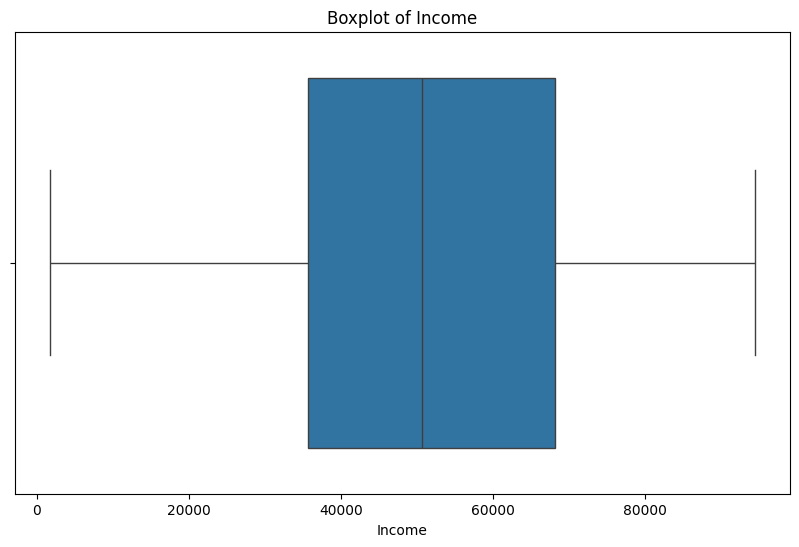

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to identify outliers in Income
plt.figure(figsize=(10, 6))
sns.boxplot(x=sheet1_data['Income'])
plt.title('Boxplot of Income')
plt.show()

# IQR method for handling outliers
Q1 = sheet1_data['Income'].quantile(0.25)
Q3 = sheet1_data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Capping outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sheet1_data['Income'] = sheet1_data['Income'].clip(lower=lower_bound, upper=upper_bound)


1. Insights:
* **Income Distribution:**The boxplot shows that the income distribution is relatively compact, with no visible outliers.
The data spans from approximately $0 to $90,000, with most values concentrated in the interquartile range (IQR).
* **Median and Spread:**The median income is centrally placed in the IQR, indicating a balanced distribution.
There is no significant skewness in the data as the whiskers on both ends are of equal length.
* **Uniform Data:**The absence of outliers suggests that the dataset is clean with respect to income, and extreme values do not significantly affect the analysis.


2. Recommendations:
* Since the income range is broad, consider segmenting customers into low, medium, and high-income groups.
* Develop marketing strategies that cater to each group.
* Use this income data to customize products, ensuring accessibility for lower-income groups and exclusivity for higher-income groups.
* Explore combining income data with other variables (e.g., spending habits or family composition) for deeper customer segmentation.
* Leverage the income distribution to experiment with dynamic pricing strategies to attract a diverse customer base.
* Investigate if income patterns vary geographically to create location-based marketing campaigns.

### Task - 3 - Probability Distributions

#### code to identify normal distribution

In [10]:
from scipy.stats import shapiro, norm

# Test for normality (Shapiro-Wilk Test)
stat, p = shapiro(sheet1_data['Income'])
if p > 0.05:
    print("Income follows a normal distribution (p-value:", p, ")")
else:
    print("Income does not follow a normal distribution (p-value:", p, ")")


Income does not follow a normal distribution (p-value: 1.1146908505166437e-11 )


The income data significantly deviates from a **normal distribution (p-value: 1.11e-11)**, indicating the need for non-parametric methods or data transformation for accurate analysis.

####Code for Binomial Distribution:

In [11]:
# Check proportions of binary variables
binomial_vars = ['Response', 'Complain']
for var in binomial_vars:
    prob = sheet1_data[var].mean()
    print(f"Variable: {var}, Probability of Success: {prob:.2f}, Expected Value: {len(sheet1_data) * prob:.2f}")


Variable: Response, Probability of Success: 0.15, Expected Value: 200.00
Variable: Complain, Probability of Success: 0.01, Expected Value: 12.00


1. For the **Response** variable, the probability of success is 15%, with an expected value of 200, indicating that 15% of customers are likely to respond to marketing campaigns, resulting in an estimated 200 responses.  

2. For the **Complain** variable, the probability of success is 1%, with an expected value of 12, suggesting that 1% of customers are likely to file complaints, totaling approximately 12 complaints.

#### Income Threshold Probability Estimation

In [12]:
# Probability of Income being greater than a threshold (e.g., 60,000)
mean_income = sheet1_data['Income'].mean()
std_income = sheet1_data['Income'].std()

# Calculate probability
threshold = 60000
probability = 1 - norm.cdf(threshold, mean_income, std_income)
print(f"Probability of Income > {threshold}: {probability:.2f}")


Probability of Income > 60000: 0.33


#### Correlation Insights Through Heatmap Visualization

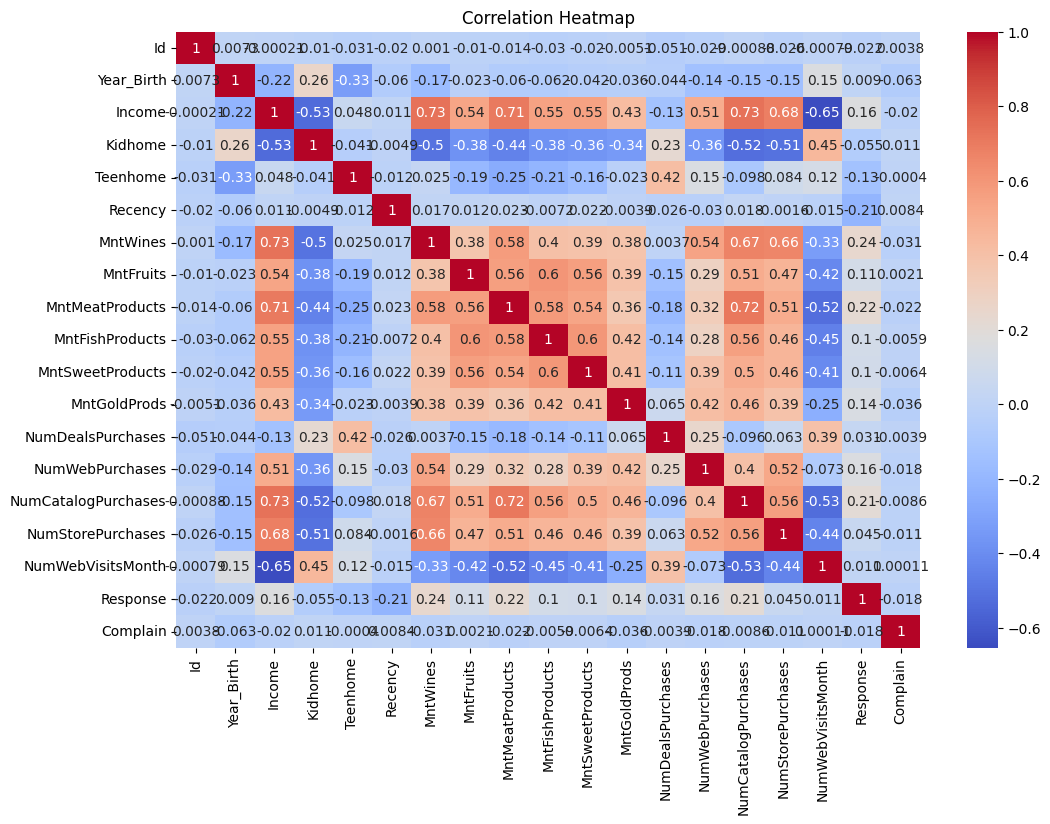

In [13]:
# Select only numeric columns for the correlation heatmap
numeric_columns = sheet1_data.select_dtypes(include=['number']).columns
correlation_matrix = sheet1_data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Insights:
* **High Spenders**: NumStorePurchases and NumCatalogPurchases are strongly correlated with spending on MntWines, MntMeatProducts, and MntFishProducts, indicating high-value customers in these categories.
* **Low Spenders**: Frequent web visitors (NumWebVisitsMonth) spend less, as seen by negative correlations with major spending categories.
* **Income Influence:** Higher income correlates with increased spending on wines and meats.
* **Age and Spending:** Younger customers spend more, while older ones show reduced spending tendencies.

2. Recommendations:
* **Focus on High-Value Segments:** Target customers with high store or catalog purchases using bundled offers in wines, meat, and fish.
* **Engage Digital Visitors**: Convert frequent website visitors into buyers with personalized promotions or loyalty incentives.
* **Income-Specific Offers:** Promote premium products to high-income groups and value deals to lower-income customers.
* **Age-Based Campaigns**: Use digital channels to attract younger customers with tailored campaigns and offers.

### Task - 4 - **Insights and Customer Segmentation**

In [14]:
# Create 'Total_Spending' by summing all monetary columns
sheet1_data['Total_Spending'] = sheet1_data[['MntWines', 'MntMeatProducts', 'MntFishProducts',
                                             'MntFruits', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


#### Customer Segmentation Using K-Means Clustering

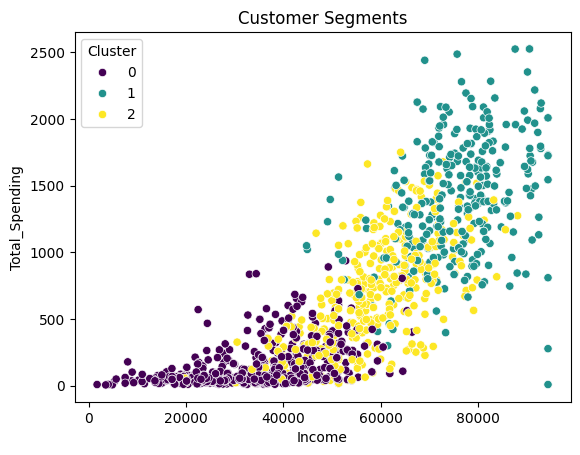

In [15]:
# Perform clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant numeric features
features = sheet1_data[['Income', 'Total_Spending', 'Kidhome', 'Teenhome', 'Recency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
sheet1_data['Cluster'] = kmeans.fit_predict(scaled_features)


#### Visualising the clusters

In [ ]:

# Visualize clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Income', y='Total_Spending', hue='Cluster', data=sheet1_data, palette='viridis')
plt.title('Customer Segments')
plt.show()


Insights:
1. **Segment Distribution:**

* **Cluster 0 (Purple):** Represents customers with low income and low spending.
* **Cluster 1 (Teal)**: Comprises middle-income customers with moderate spending.
* **Cluster 2 (Yellow):** High-income customers with high spending behavior.
2. **Income-Spending Relationship**:
* A positive correlation is evident; higher-income customers tend to spend more, with distinct clustering based on spending capacity.

3. **Potential for Targeting:**

* **Cluster 2** offers high-value opportunities for premium products or loyalty programs.
* **Cluster 1** represents an adaptable group that could be incentivized to increase spending.

In [16]:
sheet1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1322 entries, 0 to 2238
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1322 non-null   int64         
 1   Year_Birth           1322 non-null   float64       
 2   Education            1322 non-null   object        
 3   Marital_Status       1322 non-null   object        
 4   Income               1322 non-null   float64       
 5   Kidhome              1322 non-null   int64         
 6   Teenhome             1322 non-null   int64         
 7   Dt_Customer          1322 non-null   datetime64[ns]
 8   Recency              1322 non-null   int64         
 9   MntWines             1322 non-null   int64         
 10  MntFruits            1322 non-null   int64         
 11  MntMeatProducts      1322 non-null   int64         
 12  MntFishProducts      1322 non-null   int64         
 13  MntSweetProducts     1322 non-null   i

#### Cluster-Wise Summary Statistics for Numeric Features

In [17]:
# Group data by 'Cluster' and calculate the mean for numeric columns only
numeric_columns = sheet1_data.select_dtypes(include=['number']).columns
cluster_summary = sheet1_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


                  Id   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5450.883914  1972.600332  34289.917910  0.870647  0.346600   
1        5656.700000  1967.406452  75967.072387  0.048387  0.051613   
2        5306.728606  1964.237164  57587.564792  0.100244  1.073350   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        49.402985   55.608624   6.887231        33.703151        10.719735   
1        51.674194  650.032258  62.519355       458.212903        91.570968   
2        47.601467  400.968215  23.743276       126.618582        32.628362   

         ...  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster  ...                                                     
0        ...     20.716418           2.404643         2.595357   
1        ...     74.006452           1.093548     

####Analyze Clusters

In [18]:
# Analyze the most common categorical values (mode) within each cluster
categorical_columns = ['Education', 'Marital_Status']
cluster_categories = sheet1_data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])
print(cluster_categories)


          Education Marital_Status
Cluster                           
0        Graduation        Married
1        Graduation        Married
2        Graduation        Married


####Visualize Cluster Differences

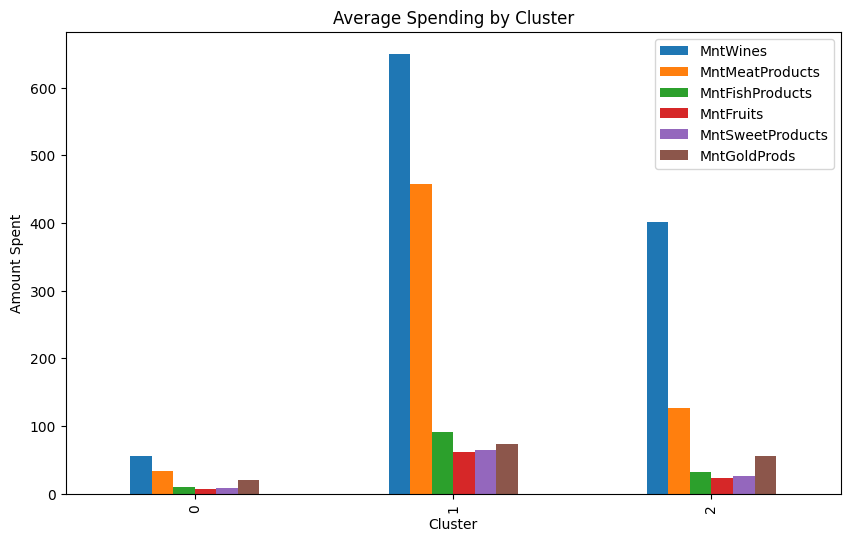

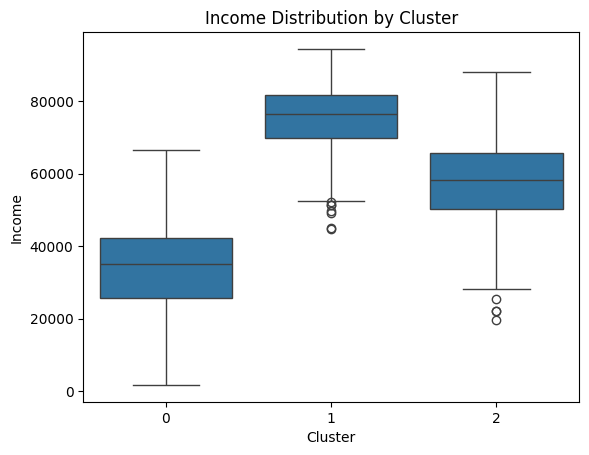

In [19]:
# Spending patterns per cluster
spending_columns = ['MntWines', 'MntMeatProducts', 'MntFishProducts',
                    'MntFruits', 'MntSweetProducts', 'MntGoldProds']
sheet1_data.groupby('Cluster')[spending_columns].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending by Cluster')
plt.ylabel('Amount Spent')
plt.show()

# Income vs Total Spending boxplot
sns.boxplot(x='Cluster', y='Income', data=sheet1_data)
plt.title('Income Distribution by Cluster')
plt.show()


1. Average Spending by Cluster (Bar Chart):
* Cluster 0:

Exhibits minimal spending across all product categories, indicating a potentially less affluent or conservative spending behavior.
* Cluster 1:

Significantly higher spending is observed, especially on Wines and Meat Products.
Moderate spending on other categories like Fish Products, Fruits, and Gold Products suggests diverse but luxury-focused spending habits.
* Cluster 2:

Spending is relatively higher than Cluster 0 but lower than Cluster 1, especially on Wines and Meat Products.
Spending on other categories is modest but consistent.

2. Recommendations:
*  **Cluster 1**: Focus on premium products like Wines and Meat Products. Offer loyalty programs to retain high spenders.
* **Cluster 0**: Emphasize affordability with discounts and budget-friendly bundles.
*  **Cluster 2**: Target with mid-range products and occasional premium options.
* **Outliers**: Analyze outliers in Cluster 1 for potential untapped opportunities.


### Task - 5 - Conclusion and recommendations:

#### Conclusion


The analysis of customer purchasing behavior provided the following insights:

1. **Customer Segments:**

* Clustering revealed three distinct customer groups based on income and spending patterns.
* Cluster 1 represents the high-income, high-spending segment, predominantly purchasing wines and meat products.
* Cluster 0 is the low-income, budget-conscious group with minimal spending across all product categories.
* Cluster 2 includes moderate-income customers with balanced spending patterns.
2. **Product Preferences:**

* Wines and meat products are the most purchased items, especially by customers in Cluster 1.
* Lower demand was observed for products like fish, fruits, and sweet products across all clusters.
3. **Behavioral Trends:**

* High-income customers (Cluster 1) show a preference for premium products, while low-income customers (Cluster 0) prioritize affordability.
* Customers tend to favor categories that align with their income level, highlighting a clear correlation between income and product preference.


####Recommendations

1. **Focus on High-Value Customers (Cluster 1):**

* **Strategy:** Invest in personalized marketing campaigns promoting premium products like wines and meat.
* **Execution:** Offer loyalty rewards, exclusive deals, and premium product bundles to retain and grow this segment.
2. **Attract Budget-Conscious Customers (Cluster 0):**

* **Strategy:** Introduce affordable product bundles and discount campaigns.
* **Execution:** Highlight value-for-money deals through targeted advertising to increase engagement.
3. **Expand Mid-Range Offerings (Cluster 2):**

* **Strategy: **Offer mid-priced product bundles combining popular and less-purchased items (e.g., wines and fish).
* **Execution:** Launch seasonal offers and promotions to encourage balanced spending across categories.
4. **Optimize Product Portfolio:**

* Increase inventory of high-demand products (e.g., wines, meat) and consider repositioning or discounting low-demand items (e.g., fish, sweets).
5. **Segment-Based Engagement:**

* Use email campaigns and targeted ads tailored to the preferences of each customer cluster to maximize marketing ROI.